# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free-form project, you'll get a chance to practice all of these skills with the Boston Housing dataset, which contains housing values in the suburbs of Boston. The Boston housing data is commonly used by aspiring Data Scientists.

## Objectives

You will be able to:

* Perform a full exploratory data analysis process to gain insight about a dataset 

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `'train.csv'`) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create two new DataFrames based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't 
    - Create two new DataFrames based on a certain split for crime rate 
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This DataFrame contains the following columns:

- `crim`: per capita crime rate by town  
- `zn`: proportion of residential land zoned for lots over 25,000 sq.ft  
- `indus`: proportion of non-retail business acres per town   
- `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
- `nox`: nitrogen oxide concentration (parts per 10 million)   
- `rm`: average number of rooms per dwelling   
- `age`: proportion of owner-occupied units built prior to 1940  
- `dis`: weighted mean of distances to five Boston employment centers   
- `rad`: index of accessibility to radial highways   
- `tax`: full-value property-tax rate per \$10,000   
- `ptratio`: pupil-teacher ratio by town    
- `b`: 1000(Bk - 0.63)^2 where Bk is the proportion of African American individuals by town   
- `lstat`: lower status of the population (percent)   
- `medv`: median value of owner-occupied homes in $10000s 
  
    
**Source**
- Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

- Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

**Important**: We mentioned in our data ethics lesson earlier that data can include offensive or inappropriate language at times. This is already becoming very apparent in the Boston Data, which includes a racial variable. 
Note that the Boston Housing data was constructed in the 1970’s, and is based on US census Data. On census.gov, you can read the following note:
> "Census statistics date back to 1790 and reflect the growth and change of the United States. Past census reports contain some terms that today's readers may consider obsolete and inappropriate. As part of our goal to be open and transparent with the public, we are improving access to all Census Bureau original publications and statistics, which serve as a guide to the nation's history."

With that note, it is important to absolutely handle with care, and it is strongly adviced to _not_ use the racial variable when creating a predictive model.


In [2]:
## Goal 1: Load train.csv data and import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load data
df = pd.read_csv('train.csv')
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [3]:
df.tail()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
332,506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
b          333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [5]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [6]:
## Goal 2: Use built-in Python functionas to explore measures of centrality (mean, mode, media) 
## and disperson (variance, stddev) for at least 3 variables.
## Part 1: Gather all necessary functions

def get_mean(data):
    count = 0
    for i in data:
        count += i
    mean = round(count / len(data), 2)
    return mean

def get_median(data):
    data_sorted = sorted(data)
    if len(data_sorted) % 2 == 0:
        val1_index = int((len(data_sorted) / 2) - 1)
        val2_index = val1_index + 1
        return (data_sorted[val1_index] + data_sorted[val2_index]) / 2
    else:
        med_index = (len(data_sorted) // 2) 
        return data_sorted[med_index]
    
def get_mode(data):
    # Create and populate frequency distribution
    frequency_dict = {}
    # If an element is not in the dictionary , add it with value 1
    # If an element is already in the dictionary , +1 the value
    for i in data:
        if i not in frequency_dict:
            frequency_dict[i] = 1
        else:
            frequency_dict[i] += 1
    # Create alist for mode values
    modes = []
    #from the dictionary, add element(s) to the modes list with max frequency
    highest_freq = max(frequency_dict.values())
    for key, val in frequency_dict.items():
        if val == highest_freq:
            modes.append(key)
    # Return the mode list 
    return modes

def get_variance(sample):

    # First, calculate the sample mean
    n = len(sample)
    total = sum(sample)
    sample_mean = total/n
    
    # Now, subtract the sample mean from each point and square the result 
    val_minus_mu_accumulator = 0
    for i in sample:
        val_minus_mu_accumulator += (i - sample_mean)**2
    
    # Divde the total by the number of items in the sample  
    variance = val_minus_mu_accumulator / (n - 1)
    
    return round(variance, 2)

from math import sqrt

def get_stddev(list):
    
    stddev = sqrt(get_variance(list))
    
    return round(stddev, 2) 


In [7]:
## Goal 2: Use built-in Python functionas to explore measures of centrality (mean, mode, media) 
## and disperson (variance, stddev) for at least 3 variables.
## Part 2: Choose variables (crim, ptratio, medv) and implement function

variables = ['crim', 'ptratio', 'medv']
for variable in variables:
    mean = get_mean(df[variable])
    mode = get_mode(df[variable])
    median = get_median(df[variable])
    variance = get_variance(df[variable])
    stddev = get_stddev(df[variable])
    
    print(f"Centrality measures for {variable} include mean of {mean}, mode of {mode}, & median of {median}.")
    print(f"Dispersion measures for {variable} include variance of {variance} and stddev of {stddev}.\n")
    
    

Centrality measures for crim include mean of 3.36, mode of [0.01501], & median of 0.26169000000000003.
Dispersion measures for crim include variance of 54.06 and stddev of 7.35.

Centrality measures for ptratio include mean of 18.45, mode of [20.2], & median of 19.0.
Dispersion measures for ptratio include variance of 4.63 and stddev of 2.15.

Centrality measures for medv include mean of 22.77, mode of [50.0], & median of 21.6.
Dispersion measures for medv include variance of 84.15 and stddev of 9.17.



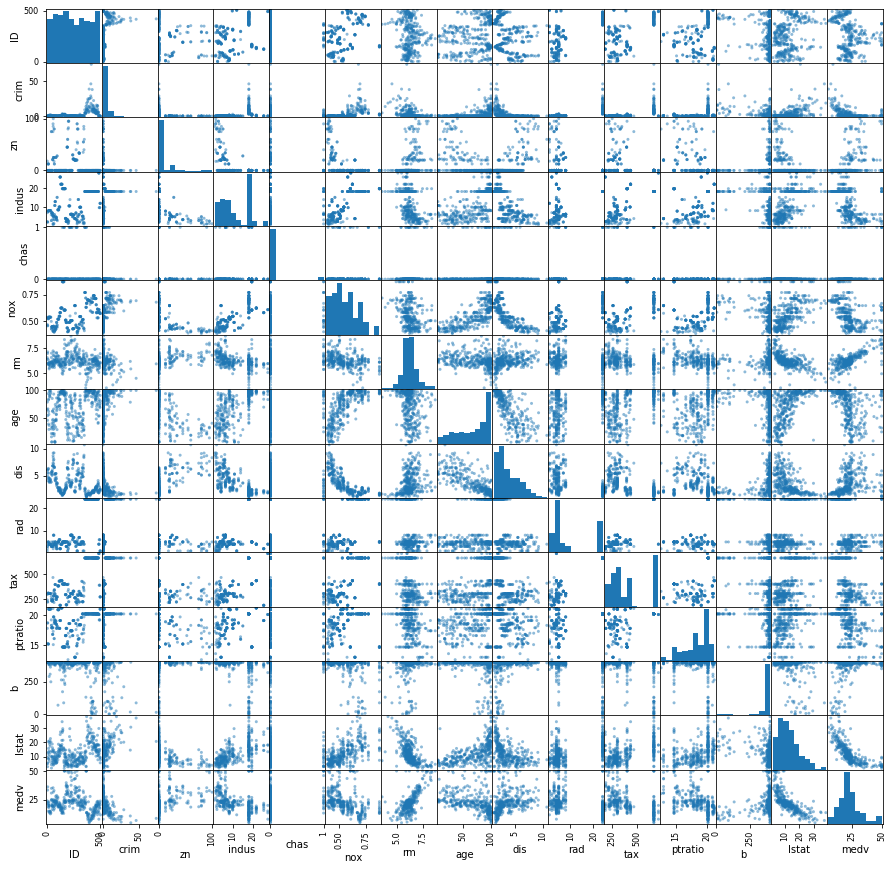

In [8]:
## Goal 3: Create meaningful subsets of the data using selection operations like .loc and .iloc or related operations
## Find meaningful subsets by "investigating dsitrubutions" using scatter_matrixm method from Pandas
pd.plotting.scatter_matrix(df, figsize = (15,15))
plt.show()

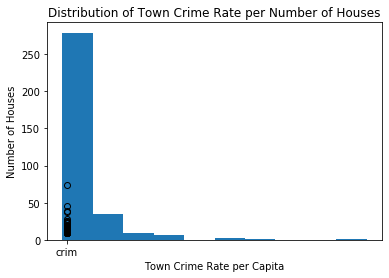

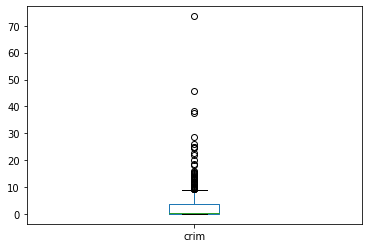

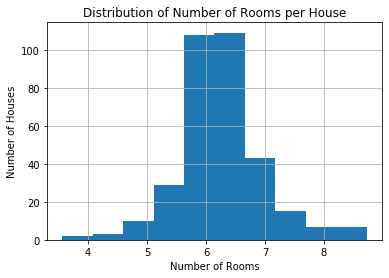

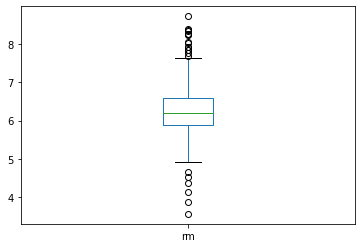

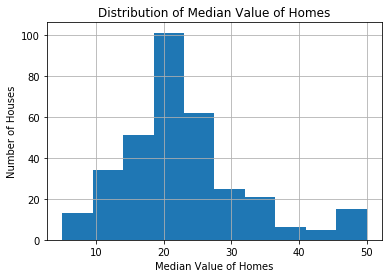

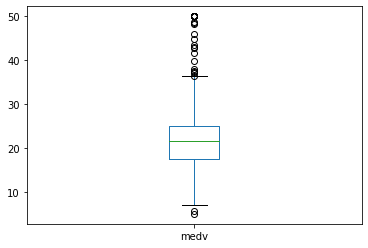

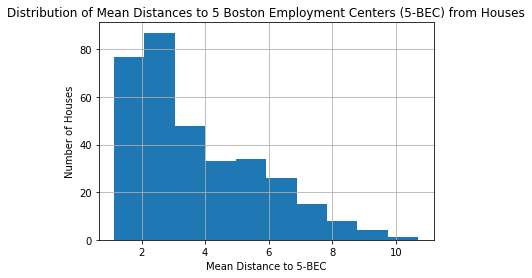

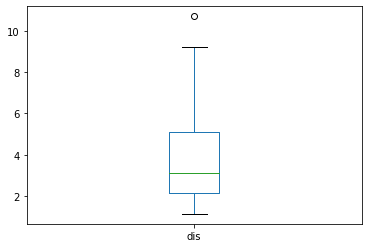

In [19]:
## Look for graphs that show clear trends (skewed, normal distributions). NTS --> when they are "plotted against each other",
## it's really a frequency distribution displayed with (histogram) which in this case is plotting the number of houses as the indep. var.
## Examples of meaning subsets based on the historgams: crim (skewed), rm (skewed) , medv(normal), dis (skewed). 
## Though zn, chas, and lstat seem like they'd make meaning good candidates, they are all categorical data that don't
## necessarily have well understood metrics. So...we're leaving 'em out.

## Create Individual Histograms 
# df[''].hist();
# plt.title('')
# plt.xlabel('')
# plt.ylabel('Number of Houses');

## Create Individual Boxplots
# df[''].plot(kind='box');


# crim histogram and boxplot

df['crim'].hist();
plt.title('Distribution of Town Crime Rate per Number of Houses')
plt.xlabel('Town Crime Rate per Capita')
plt.ylabel('Number of Houses');df['crim'].plot(kind='box');
plt.show()
df['crim'].plot(kind='box');
plt.show()

# rm histogram and boxplot 

df['rm'].hist();
plt.title('Distribution of Number of Rooms per House')
plt.xlabel('Number of Rooms')
plt.ylabel('Number of Houses');
plt.show()
df['rm'].plot(kind='box');
plt.show()

# medv histogram and boxplot

df['medv'].hist();
plt.title('Distribution of Median Value of Homes')
plt.xlabel('Median Value of Homes')
plt.ylabel('Number of Houses');
plt.show()
df['medv'].plot(kind='box');
plt.show()

# dis histogram and boxplot

df['dis'].hist();
plt.title('Distribution of Mean Distances to 5 Boston Employment Centers (5-BEC) from Houses')
plt.xlabel('Mean Distance to 5-BEC')
plt.ylabel('Number of Houses');
plt.show()
df['dis'].plot(kind='box');
plt.show()

## Investigate Correlations
# for n, feat1 in enumerate(df.columns):
#     for feat2 in df.columns[n+1:]:
#         r2 = np.corrcoef(df[feat1], df[feat2])[0][1]
#         if r2 > .7:
#             print('{} and {} have a correlation coefficient of {}!'.format(feat1, feat2, r2))

In [33]:
## Investigate Correlations
## This set of code allows you to walk through the entire dataset, looking for correlations, but only noting them
## if they are above a certain threshold (0.7).
for n, feat1 in enumerate(df.columns): #loops through all columns once while creating an enumerated index to follow
    for feat2 in df.columns[n+1:]: #loops through again without duplicating the initial feature
        r2 = np.corrcoef(df[feat1], df[feat2])[0][1] #use corrcoef() nump method to find the corr coeff between feat.
        r2 = round(r2,2)
        if abs(r2) > .7:
            print('{} and {} have a correlation coefficient of {}!'.format(feat1, feat2, r2))



ID and rad have a correlation coefficient of 0.71!
indus and nox have a correlation coefficient of 0.75!
indus and tax have a correlation coefficient of 0.71!
nox and age have a correlation coefficient of 0.74!
nox and dis have a correlation coefficient of -0.77!
age and dis have a correlation coefficient of -0.76!
rad and tax have a correlation coefficient of 0.9!
lstat and medv have a correlation coefficient of -0.74!


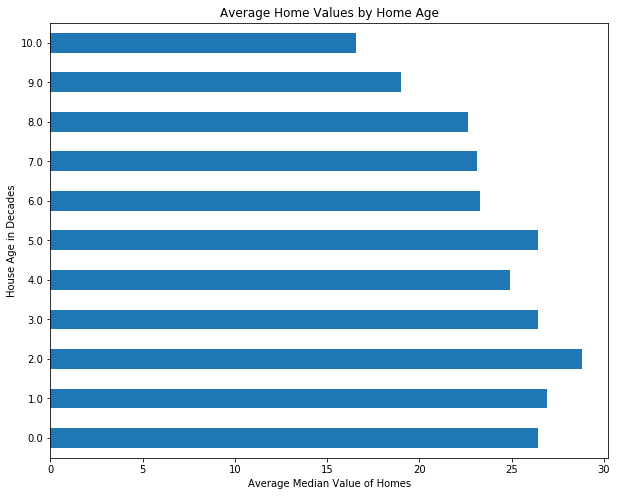

In [34]:
## Specific Exploratory analysis example of Median House Value and Age
df['decades'] = df.age // 10
to_plot = df.groupby('decades').medv.mean() # remember this grouping doesn't change the actual data
to_plot.plot(kind='barh', figsize=(10,8))
plt.ylabel('House Age in Decades')
plt.xlabel('Average Median Value of Homes')
plt.title('Average Home Values by Home Age');

In [44]:
## Try this on the test set of data, see how they compare
df_test = pd.read_csv('test.csv')
df_test.head(100)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,290,0.04297,52.5,5.32,0,0.405,6.565,22.9,7.3172,6,293,16.6,371.72,9.51
96,292,0.07886,80.0,4.95,0,0.411,7.148,27.7,5.1167,4,245,19.2,396.90,3.56
97,295,0.08199,0.0,13.92,0,0.437,6.009,42.3,5.5027,4,289,16.0,396.90,10.40
98,296,0.12932,0.0,13.92,0,0.437,6.678,31.1,5.9604,4,289,16.0,396.90,6.27


In [36]:
df_test.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,258.404624,4.100862,12.661850,10.835145,0.086705,0.549981,6.321237,69.245665,3.958865,9.387283,406.231214,18.469942,351.299711,12.917977
std,143.289788,10.607761,24.536277,6.596488,0.282219,0.117826,0.700621,28.248244,2.324131,8.662621,164.480626,2.196196,99.781464,7.293408
min,3.000000,0.013810,0.000000,0.460000,0.000000,0.392000,4.138000,2.900000,1.178100,1.000000,187.000000,12.600000,0.320000,1.920000
25%,136.000000,0.082210,0.000000,5.320000,0.000000,0.447000,5.895000,42.800000,2.010700,4.000000,279.000000,17.000000,371.720000,6.870000
50%,268.000000,0.251990,0.000000,8.560000,0.000000,0.538000,6.223000,79.200000,3.421100,5.000000,330.000000,19.100000,390.070000,12.120000
75%,381.000000,3.673670,20.000000,18.100000,0.000000,0.624000,6.674000,94.600000,5.400700,24.000000,666.000000,20.200000,396.060000,17.210000
max,505.000000,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000


In [45]:
variables_test = ['age', 'ptratio', 'rad']
for variable in variables_test:
    mean = get_mean(df_test[variable])
    mode = get_mode(df_test[variable])
    median = get_median(df_test[variable])
    variance = get_variance(df_test[variable])
    stddev = get_stddev(df_test[variable])
    
    print(f"Centrality measures for {variable} include mean of {mean}, mode of {mode}, & median of {median}.")
    print(f"Dispersion measures for {variable} include variance of {variance} and stddev of {stddev}.\n")
    

Centrality measures for age include mean of 69.25, mode of [100.0], & median of 79.2.
Dispersion measures for age include variance of 797.96 and stddev of 28.25.

Centrality measures for ptratio include mean of 18.47, mode of [20.2], & median of 19.1.
Dispersion measures for ptratio include variance of 4.82 and stddev of 2.2.

Centrality measures for rad include mean of 9.39, mode of [24], & median of 5.
Dispersion measures for rad include variance of 75.04 and stddev of 8.66.



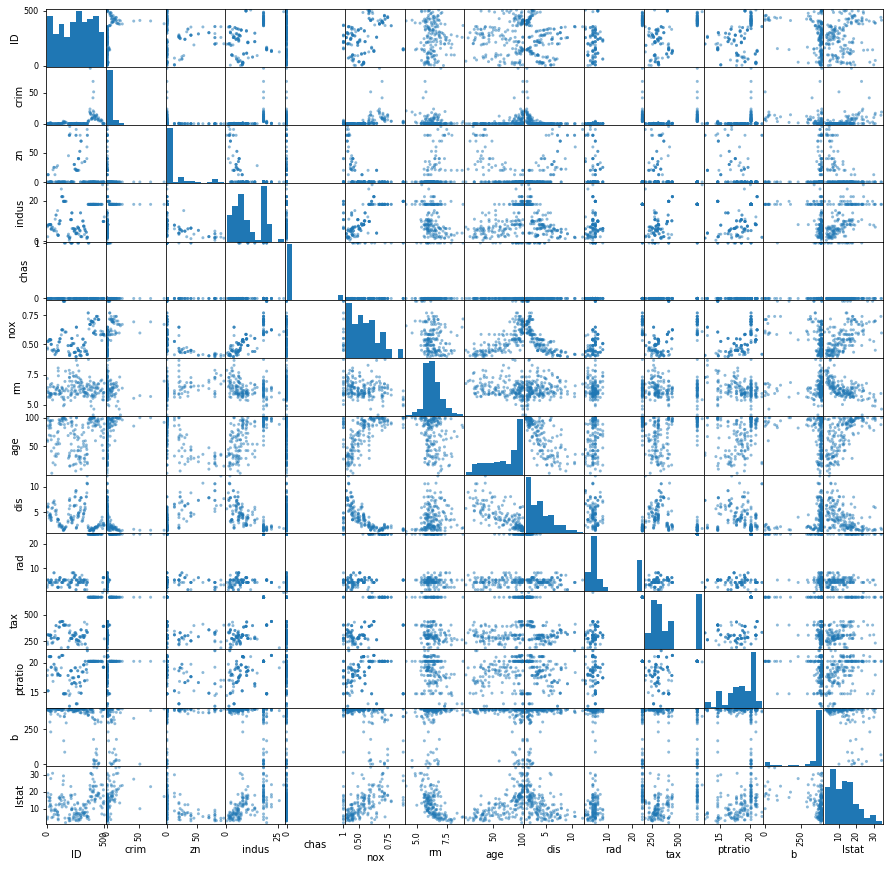

In [46]:
pd.plotting.scatter_matrix(df_test, figsize = (15,15))
plt.show()

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!